# Benefits of Normalizing Beamformers and Issues Without Normalization

* Normalization plays a crucial role in beamforming, ensuring consistent performance across varying scenarios. Below, we discuss the benefits of normalization and the problems of skipping normalization, with examples.

# Normalized vs. Unnormalized Beamformer

In [1]:
import numpy as np

# Parameters
M = 4  # Number of antennas
phi = np.radians(30)  # Desired direction
b_t = 1  # Transmitted signal

# Array response vector
s_phi = np.array([np.exp(1j * np.pi * m / 4) for m in range(M)])

# Beamformer weights (unnormalized)
w_unnormalized = s_phi
# Normalize beamformer weights
w_normalized = w_unnormalized / np.linalg.norm(w_unnormalized)

# Beamformed signal (unnormalized and normalized)
signal_unnormalized = np.dot(w_unnormalized, b_t * s_phi)
signal_normalized = np.dot(w_normalized, b_t * s_phi)

# Print results
print(f"Unnormalized Beamformed Signal Power: {np.abs(signal_unnormalized)**2}")
print(f"Normalized Beamformed Signal Power: {np.abs(signal_normalized)**2}")


Unnormalized Beamformed Signal Power: 5.872755000403113e-32
Normalized Beamformed Signal Power: 1.4681887501007782e-32


# Effect of normalization on signal SNR values

In [2]:
# Simulate received signal with noise
noise = np.random.normal(0, 0.1, M) + 1j * np.random.normal(0, 0.1, M)
x_t = b_t * s_phi + noise

# Unnormalized beamforming
output_unnormalized = np.dot(w_unnormalized, x_t)
snr_unnormalized = np.abs(output_unnormalized)**2 / np.var(noise)

# Normalized beamforming
output_normalized = np.dot(w_normalized, x_t)
snr_normalized = np.abs(output_normalized)**2 / np.var(noise)

# Print SNR
print(f"SNR (Unnormalized): {snr_unnormalized}")
print(f"SNR (Normalized): {snr_normalized}")


SNR (Unnormalized): 4.202248036116107
SNR (Normalized): 1.0505620090290269


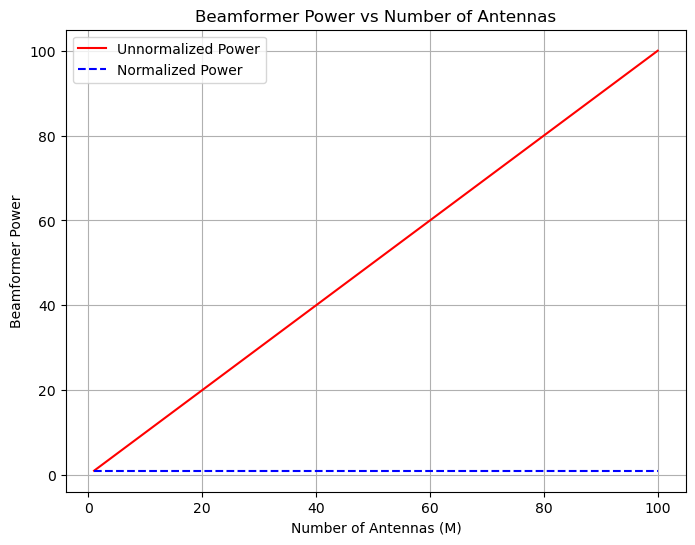

In [3]:
import matplotlib.pyplot as plt

# Beamformer power with varying M
antenna_counts = np.arange(1, 101)
power_unnormalized = antenna_counts
power_normalized = np.ones_like(antenna_counts)

plt.figure(figsize=(8, 6))
plt.plot(antenna_counts, power_unnormalized, label='Unnormalized Power', color='red')
plt.plot(antenna_counts, power_normalized, label='Normalized Power', color='blue', linestyle='--')
plt.title("Beamformer Power vs Number of Antennas")
plt.xlabel("Number of Antennas (M)")
plt.ylabel("Beamformer Power")
plt.legend()
plt.grid()
plt.show()
